In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr 
wr.filterwarnings('ignore')

In [2]:
df=pd.read_csv("SalesFINAL12312016.csv")

In [3]:
df.duplicated().sum()

0

In [4]:
df.head(3)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [8]:
# Convert SalesDate to datetime format
df['SalesDate'] = pd.to_datetime(df['SalesDate'], errors='coerce')

# Drop duplicates
df = df.drop_duplicates()

# Trim whitespace and standardize text columns
text_cols = ['InventoryId', 'Description', 'Size', 'VendorName']
df[text_cols] = df[text_cols].apply(lambda x: x.str.strip().str.title())

# Ensure numeric columns are positive
df['SalesPrice'] = df['SalesPrice'].abs()
df['SalesDollars'] = df['SalesDollars'].abs()
df['ExciseTax'] = df['ExciseTax'].abs()

# Validate SalesDollars calculation
df['CalculatedSalesDollars'] = df['SalesQuantity'] * df['SalesPrice']
discrepancy = df[df['SalesDollars'] != df['CalculatedSalesDollars']]
if not discrepancy.empty:
    print("Warning: There are discrepancies in SalesDollars calculations!")
    df['SalesDollars'] = df['CalculatedSalesDollars']  # Correct the values

df.drop(columns=['CalculatedSalesDollars'], inplace=True)


In [9]:
df.dtypes

InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
SalesQuantity              int64
SalesDollars             float64
SalesPrice               float64
SalesDate         datetime64[ns]
Volume                     int64
Classification             int64
ExciseTax                float64
VendorNo                   int64
VendorName                object
dtype: object

In [10]:
numeric_cols = ['SalesQuantity', 'SalesDollars', 'SalesPrice', 'ExciseTax']
skewness = df[numeric_cols].skew()
print("Skewness of numerical columns:\n", skewness)

Skewness of numerical columns:
 SalesQuantity    14.367691
SalesDollars     36.466717
SalesPrice       57.051762
ExciseTax        18.869643
dtype: float64


In [11]:
# Select numerical columns for outlier detection
numeric_columns = ["SalesQuantity", "SalesDollars", "SalesPrice", "Volume"]

# Dictionary to store outlier information
outlier_results = {}

# Loop through each numerical column and find outliers using IQR
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Store results
    outlier_results[col] = {
        "outlier_count": len(outliers)
    }

# Display outlier counts and thresholds for each column
outlier_results


{'SalesQuantity': {'outlier_count': 152232},
 'SalesDollars': {'outlier_count': 100693},
 'SalesPrice': {'outlier_count': 66650},
 'Volume': {'outlier_count': 24881}}

In [12]:
# df.to_csv("Final_Cleaned_Sale_data.csv", index=False)

In [13]:
df1=pd.read_csv("Final_Cleaned_Sale_data.csv")

In [14]:
df1.head(1)

,Unnamed: 0,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,01-01-2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [15]:
#######################33 VISULIAZATION PARTS ###########################################################

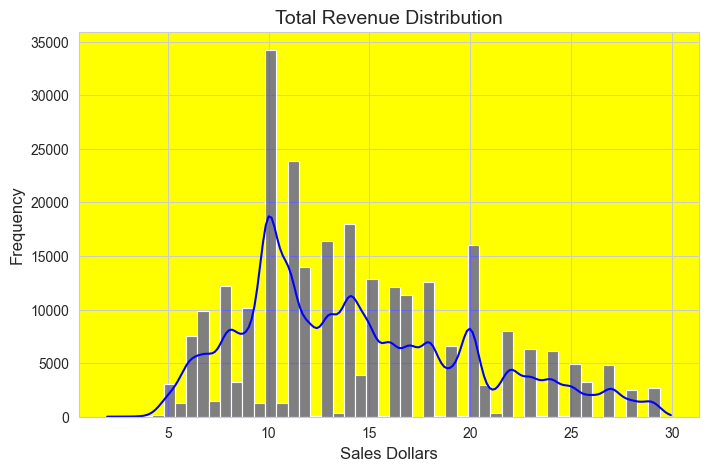

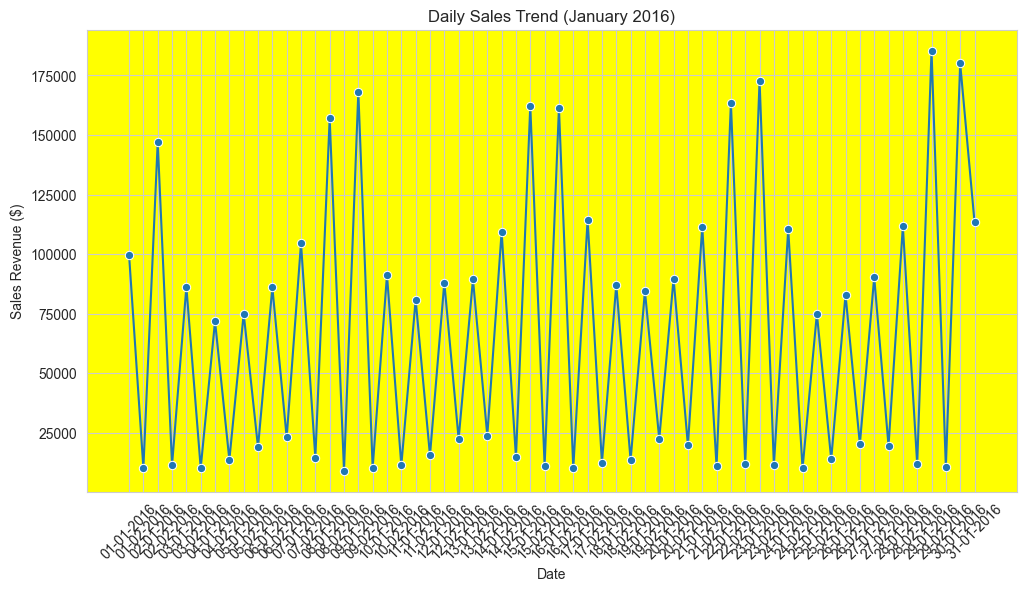

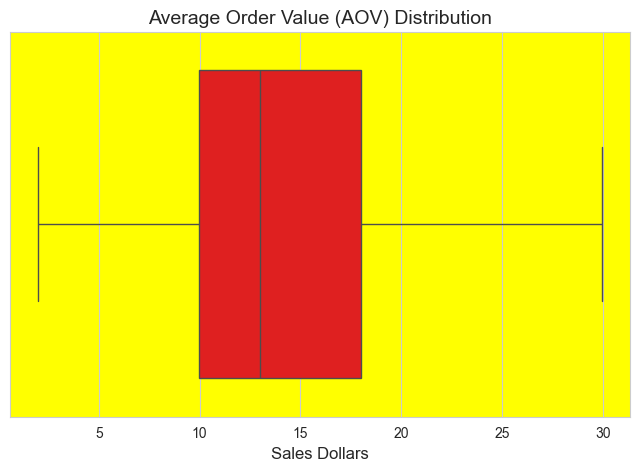

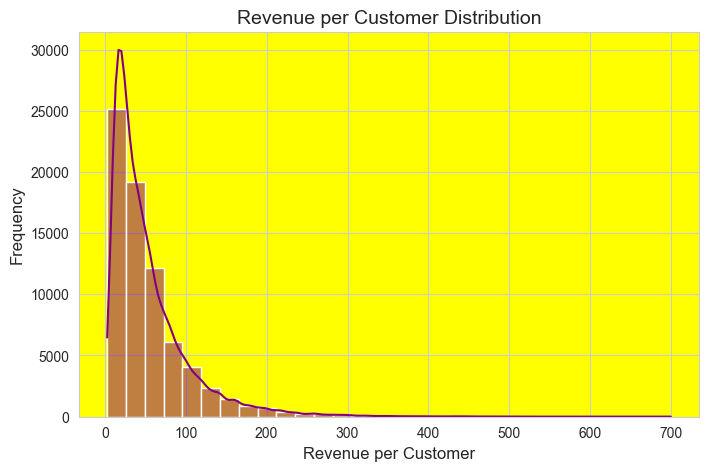

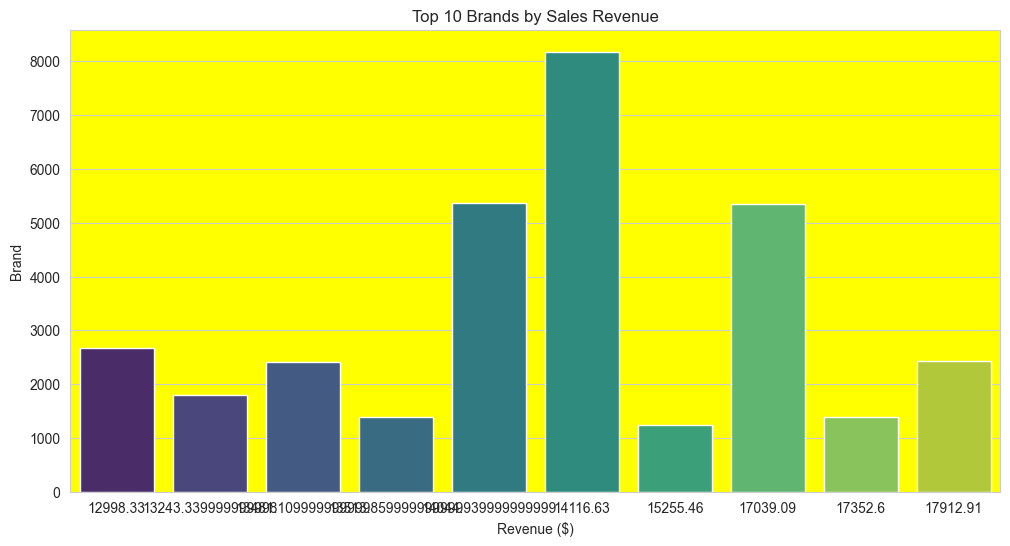

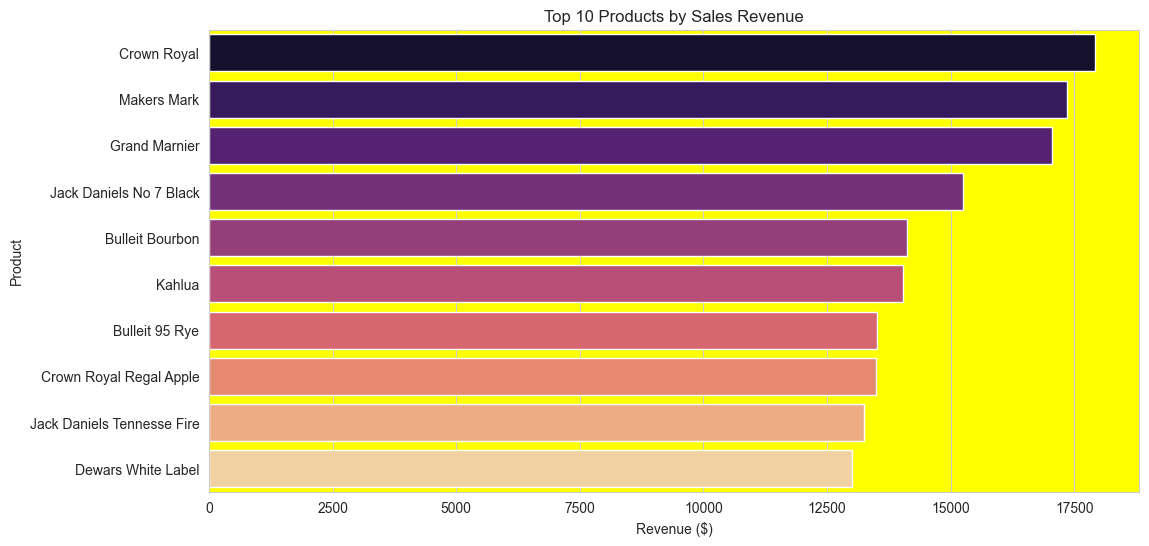

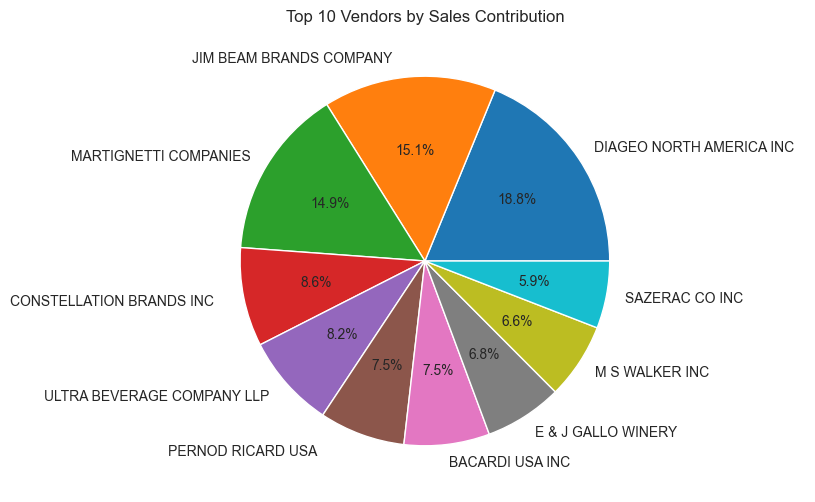

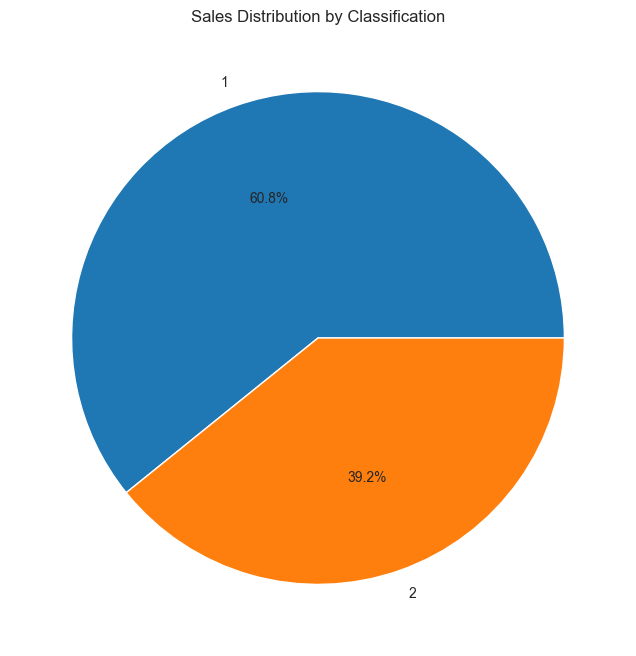

In [16]:
sns.set_style("whitegrid")

# Calculate KPIs
total_revenue = df1["SalesDollars"].sum()
avg_order_value =df1["SalesDollars"].mean()  # Approximation if order details are not available
sales_growth_rate = df1["SalesDollars"].pct_change().mean() * 100

# Visualization 1: Total Revenue Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df1["SalesDollars"], bins=50, kde=True, color='blue')
plt.title("Total Revenue Distribution", fontsize=14)
plt.xlabel("Sales Dollars", fontsize=12)
plt.gca().set_facecolor("yellow")
plt.ylabel("Frequency", fontsize=12)
plt.show()


# Visualization 2: 'Daily Sales Trend (January 2016)

daily_sales = df1.groupby('SalesDate')['SalesDollars'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='SalesDate', y='SalesDollars', marker='o')
plt.title('Daily Sales Trend (January 2016)')
plt.xlabel('Date')
plt.gca().set_facecolor("yellow")
plt.ylabel('Sales Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Visualization 3: Average Order Value Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1["SalesDollars"], color='red')
plt.gca().set_facecolor("yellow")
plt.title("Average Order Value (AOV) Distribution", fontsize=14)
plt.xlabel("Sales Dollars", fontsize=12)
plt.show()

# Visualization 4: Revenue per Customer (if Customer ID available)
if "InventoryId" in df1.columns:
    revenue_per_customer = df1.groupby("InventoryId")["SalesDollars"].sum()
    
    plt.figure(figsize=(8, 5))
    sns.histplot(revenue_per_customer, bins=30, kde=True, color='purple')
    plt.title("Revenue per Customer Distribution", fontsize=14)
    plt.gca().set_facecolor("yellow")
    plt.xlabel("Revenue per Customer", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()


# Visualization 6: Top 10 Brands by Revenue
top_brands = df1.groupby('Brand')['SalesDollars'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_brands, x='SalesDollars', y='Brand', palette='viridis')
plt.gca().set_facecolor("yellow")
plt.title('Top 10 Brands by Sales Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Brand')
plt.show()


# Visualization 7: Top 10 Products by Revenue
top_products = df1.groupby('Description')['SalesDollars'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='SalesDollars', y='Description', palette='magma')
plt.gca().set_facecolor("yellow")
plt.title('Top 10 Products by Sales Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Product')
plt.show()

# Visualization 8: Vendor Contribution
vendor_sales = df1.groupby('VendorName')['SalesDollars'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
plt.pie(vendor_sales['SalesDollars'], labels=vendor_sales['VendorName'], autopct='%1.1f%%')
plt.gca().set_facecolor("yellow")
plt.title('Top 10 Vendors by Sales Contribution')
plt.show()

# Visualization 9: Sales by Classification
classification_sales = df1.groupby('Classification')['SalesDollars'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(classification_sales['SalesDollars'], labels=classification_sales['Classification'], autopct='%1.1f%%')
plt.gca().set_facecolor("yellow")
plt.title('Sales Distribution by Classification')
plt.show()